<a href="https://colab.research.google.com/github/OliwiaP/Python_for_Data_Analysis/blob/master/hist_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

!pip install git+https://github.com/julianirwin/hloopy.git

!pip install lmfit

  Cloning https://github.com/julianirwin/hloopy.git to /tmp/pip-req-build-s2az8som
  Running command git clone -q https://github.com/julianirwin/hloopy.git /tmp/pip-req-build-s2az8som
  Created wheel for hloopy: filename=hloopy-0.0.0.dev0-cp37-none-any.whl size=19260 sha256=82c35e09985404795b1744a47aeb1abadefac6c2293187782ed92a340177aa71
  Stored in directory: /tmp/pip-ephem-wheel-cache-wy50w86r/wheels/b9/4c/2f/17948870d0861922a37ab5c08eddf724f0585dba2fdc75a1a8
Successfully built hloopy
     |████████████████████████████████| 307kB 2.9MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 256kB 3.8MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.2-cp37-none-any.whl size=85265 sha256=aae0e79066f6c26d076b8849a88531f3f11246eda6330fb09debda6f01edf3ef
  Stored in directory: /root/.cache/pip/wheels/d4/5e/db/d9f5987d9f15bf910feb5e0274ac601d5f2161dc78aedfacfa
  Created wheel for asteval: filename=asteval-0.9.23-cp37-none-any.whl size=17419 sha256

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loop_H_M_H_M.txt to loop_H_M_H_M.txt


In [3]:
import hloopy as hlpy

datapath = 'loop_H_M_H_M.txt'

df4 = pd.read_csv(datapath, names=("h_u","m_u","h_l","m_l"))
df4.head()

,h_u,m_u,h_l,m_l
0,50000.00,6.460000e-08,-50190.30,0.000003
1,47681.23,5.710000e-06,-47681.23,-0.000004
2,45170.69,1.010000e-05,-45170.69,-0.000009
3,42662.34,1.630000e-05,-42663.08,-0.000014
4,40154.00,2.150000e-05,-40154.00,-0.000016


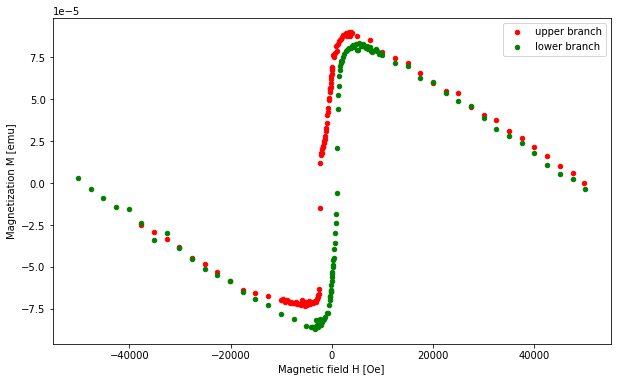

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
df4.plot.scatter(x='h_u', y='m_u', ax=ax, label='upper branch', color='red')
df4.plot.scatter(x='h_l', y='m_l', ax=ax, label='lower branch', color='green')
ax.set_xlabel('Magnetic field H [Oe]')
ax.set_ylabel('Magnetization M [emu]')
ax.legend(loc='best');

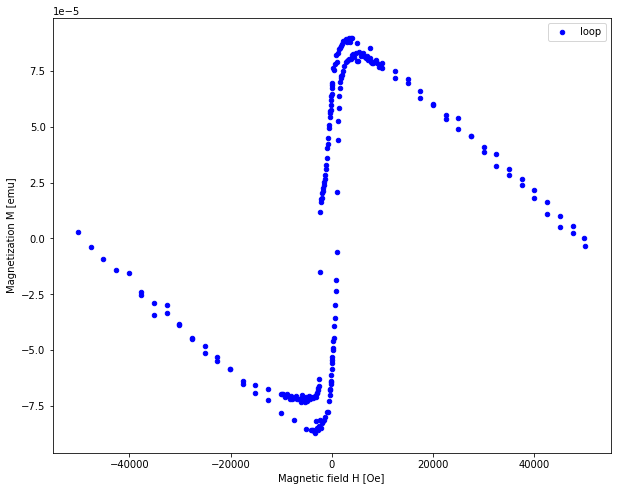

In [5]:
df2 = pd.concat([pd.DataFrame({'h' : df4.h_u, 'm' : df4.m_u}), pd.DataFrame({'h' : df4.h_l, 'm' : df4.m_l})], ignore_index=True)    # dane z 4 kolumn w 2

fig, ax = plt.subplots(figsize=(10,8))
df2.plot.scatter(x='h', y='m', ax=ax, label='loop', color='blue')
ax.set_xlabel('Magnetic field H [Oe]')
ax.set_ylabel('Magnetization M [emu]')
ax.legend(loc='best');

In [6]:
df2.to_string()

'               h             m\n0    50000.00000  6.460000e-08\n1    47681.23000  5.710000e-06\n2    45170.69000  1.010000e-05\n3    42662.34000  1.630000e-05\n4    40154.00000  2.150000e-05\n5    37645.65000  2.680000e-05\n6    35135.84000  3.090000e-05\n7    32626.76000  3.770000e-05\n8    30116.96000  4.080000e-05\n9    27608.61000  4.570000e-05\n10   25100.26000  5.390000e-05\n11   22588.99000  5.510000e-05\n12   20081.37000  5.990000e-05\n13   17570.84000  6.590000e-05\n14   15060.01000  7.160000e-05\n15   12550.64000  7.490000e-05\n16   10041.86000  7.850000e-05\n17    7530.29600  8.520000e-05\n18    5018.88500  8.770000e-05\n19    4015.40000  8.970000e-05\n20    3814.74600  8.990000e-05\n21    3614.02000  8.790000e-05\n22    3413.36700  8.990000e-05\n23    3212.56700  8.870000e-05\n24    3011.69600  8.790000e-05\n25    2811.04200  8.930000e-05\n26    2610.31600  8.840000e-05\n27    2409.59000  8.850000e-05\n28    2208.79100  8.840000e-05\n29    2008.13700  8.690000e-05\n30    1

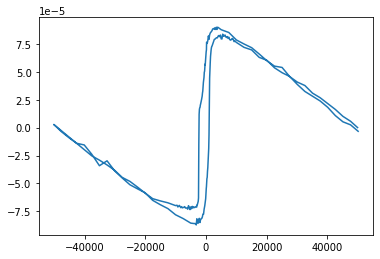

In [7]:
# Create an HLoop object, the wrapper around a datafile
hl = hlpy.HLoop(io.StringIO(df2.to_string()), delim_whitespace=True)

# Indicate which columns are the x and y data (stimulus and response).
hl.setas(x=0, y=1)

# fix for old pandas version
hl.df.ix = hl.df.iloc

fig, ax = plt.subplots()
hl.plot(ax=ax)

/usr/local/lib/python3.7/dist-packages/hloopy/extract.py:94: RuntimeWarning: Mean of empty slice.
  Hc_avgs = [x[i - avg_width:i + avg_width].mean() for i in hc_indices]
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


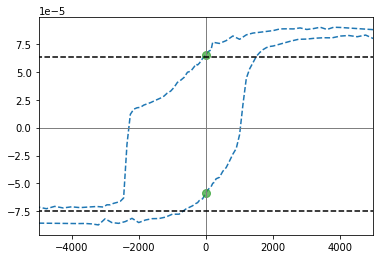

In [8]:
# Now compute the coercivity, remanence and saturation:
from hloopy.extract import Coercivity, Remanence, Saturation
fig, ax = plt.subplots()
hl.plot(ax, ls='--')
extracts = (Coercivity, Remanence, Saturation)
for e in extracts:
    e(hl).plot(ax)

plt.xlim(-5000, 5000)
plt.axhline(linewidth=1, color='grey') 
plt.axvline(linewidth=1, color='grey') 

print()

In [9]:
print(Coercivity)

<class 'hloopy.extract.Coercivity'>


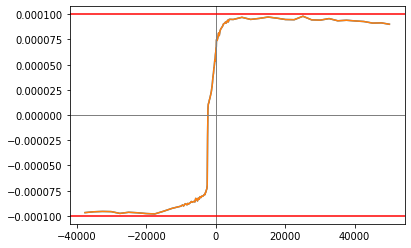

In [10]:
from hloopy.transformations import  flatten_saturation, normalize, center

h,m = flatten_saturation(x=df2.h, y=df2.m, threshold=df2.h.iloc[10])

hu,mu = flatten_saturation(x=df4.h_u, y=df4.m_u, threshold=df4.h_u.iloc[30])
hl,ml = flatten_saturation(x=df4.h_l, y=df4.m_l, threshold=df4.h_l.iloc[90])

huc, muc = center(hu, mu)

hlc, mlc = center(hl, ml)

plt.plot(hu,mu)
plt.plot(huc,muc)
#plt.xlim(-5000, 5000)
plt.axhline(linewidth=1, color='grey') 
plt.axvline(linewidth=1, color='grey') 
plt.axhline(0.0001,c='r')
plt.axhline(-0.0001,c='r')

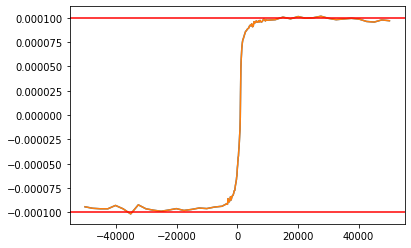

In [11]:
plt.plot(hl,ml)
plt.plot(hlc,mlc)
plt.axhline(0.0001,c='r')
plt.axhline(-0.0001,c='r')

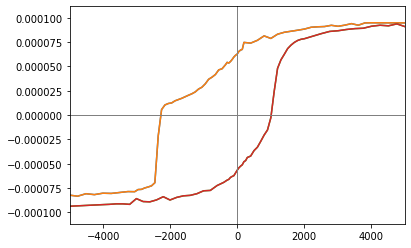

In [12]:
plt.plot(hu,mu)
plt.plot(huc,muc)
plt.plot(hl,ml)
plt.plot(hlc,mlc)
plt.xlim(-5000, 5000)
plt.axhline(linewidth=1, color='grey') 
plt.axvline(linewidth=1, color='grey') 

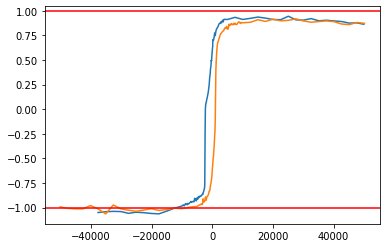

In [13]:
hun, mun = normalize( x=hu, y=mu, ylim=1.0, n_avg=25)
hln, mln = normalize( x=hl, y=ml, ylim=1.0, n_avg=25)

plt.plot(hun,mun)
plt.plot(hln,mln)
plt.axhline(1.0,c='r')
plt.axhline(-1.0,c='r')
#plt.xlim(-5000, 5000)
#plt.axhline(linewidth=1, color='grey') 
#plt.axvline(linewidth=1, color='grey') 

In [14]:
#fitowanie gornej galezi
from lmfit import Parameters, Model
pars = Parameters()
pars.add('M1', value=0.5, min=0, max=1)
pars.add('M2', expr='1-M1')
pars.add('g1', value=0.01)
pars.add('g2', value=0.001)
pars.add('H1', value=-2367)
pars.add('H2', value=-493)

In [15]:
def f_component1(x, M1, g1, H1):
    return 2.0 / np.pi * M1 * np.arctan(g1*(x-H1))

def f_component2(x, M2, g2, H2):
    return 2.0 / np.pi * M2 * np.arctan(g2*(x-H2))

mod_comp1 = Model(f_component1)
mod_comp2 = Model(f_component2)

mod = mod_comp1 + mod_comp2

In [16]:
result = mod.fit(mun, x=hun, params=pars)
print(result.fit_report())

[[Model]]
    (Model(f_component1) + Model(f_component2))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 116
    # variables        = 5
    chi-square         = 0.17434595
    reduced chi-square = 0.00157068
    Akaike info crit   = -744.035256
    Bayesian info crit = -730.267305
[[Variables]]
    M1:  0.42882689 +/- 0.01555031 (3.63%) (init = 0.5)
    M2:  0.57117311 +/- 0.01555031 (2.72%) == '1-M1'
    g1:  0.05646306 +/- 0.03813172 (67.53%) (init = 0.01)
    g2:  9.6077e-04 +/- 4.0262e-05 (4.19%) (init = 0.001)
    H1: -2366.90679 +/- 5.47550935 (0.23%) (init = -2367)
    H2: -493.047416 +/- 58.3549632 (11.84%) (init = -493)
[[Correlations]] (unreported correlations are < 0.100)
    C(M1, H2) =  0.890
    C(g1, H1) =  0.828
    C(M1, g1) = -0.717
    C(g1, H2) = -0.582
    C(M1, H1) = -0.549
    C(M1, g2) =  0.517
    C(g2, H2) =  0.462
    C(H1, H2) = -0.453
    C(g1, g2) = -0.394
    C(g2, H1) = -0.378


(-5000.0, 5000.0)

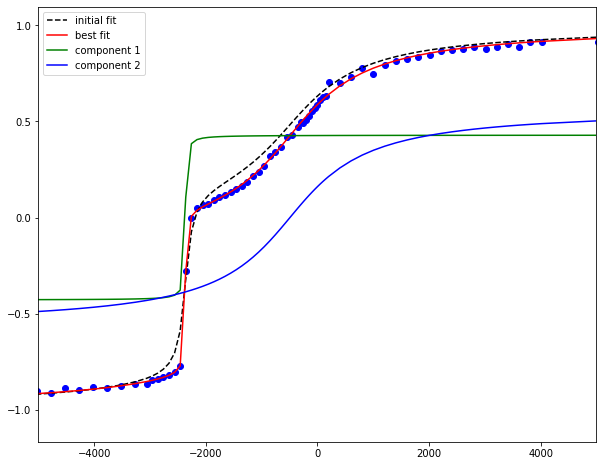

In [17]:
fig, ax = plt.subplots(figsize=(10,8))    # rozmiar wykresu


plt.plot(hun, mun, 'bo')
plt.plot(hun, result.init_fit, 'k--', label='initial fit')
plt.plot(hun, result.best_fit, 'r-', label='best fit')

plt.plot(hun, mod_comp1.eval(x=hun,
                             M1=result.best_values['M1'], 
                             g1=result.best_values['g1'],
                             H1=result.best_values['H1']), 
         'g-', label='component 1')
plt.plot(hun, mod_comp2.eval(x=hun,
                             M2=result.best_values['M2'], 
                             g2=result.best_values['g2'],
                             H2=result.best_values['H2']), 
         'b-', label='component 2')

plt.legend(loc='best')
plt.xlim(-5000, 5000)

In [18]:
# fitowanie dolnej galezi
pars.add('H3', value=1000)


In [19]:
def f_component3(x, H3):
    M3 = result.best_values['M1']
    g3 = result.best_values['g1']
    return 2.0 / np.pi * M3 * np.arctan(g3*(x-H3))

def f_component4(x):
    M4 = result.best_values['M2']
    g4 = result.best_values['g2']
    H4 = 0 - result.best_values['H2']
    return 2.0 / np.pi * M4 * np.arctan(g4*(x-H4))

mod_comp3 = Model(f_component3)
mod_comp4 = Model(f_component4)

modu = mod_comp3 + mod_comp4

In [20]:
result2 = modu.fit(mln, x=hln, params=pars)
print(result2.fit_report())

[[Model]]
    (Model(f_component3) + Model(f_component4))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 116
    # variables        = 6
    chi-square         = 0.61149667
    reduced chi-square = 0.00555906
    Akaike info crit   = -596.470572
    Bayesian info crit = -579.949031
##  Warning: uncertainties could not be estimated:
    M1:  at initial value
    g1:  at initial value
    g2:  at initial value
    H1:  at initial value
    H2:  at initial value
[[Variables]]
    M1:  0.50000000 (init = 0.5)
    M2:  0.50000000 == '1-M1'
    g1:  0.01000000 (init = 0.01)
    g2:  1.0000e-03 (init = 0.001)
    H1: -2367.00000 (init = -2367)
    H2: -493.000000 (init = -493)
    H3:  1106.80076 (init = 1000)


(-5000.0, 5000.0)

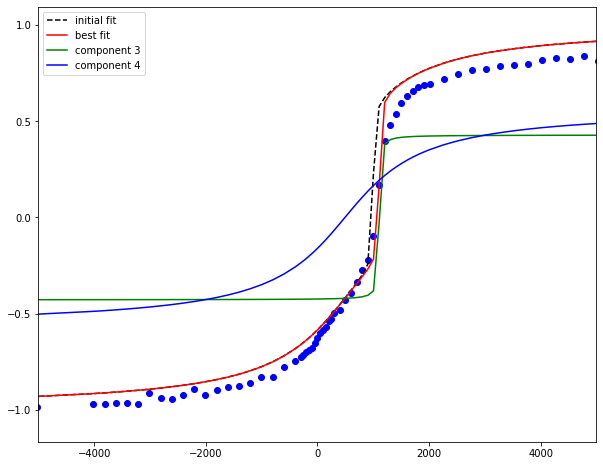

In [21]:
fig, ax = plt.subplots(figsize=(10,8))


plt.plot(hln, mln, 'bo')
plt.plot(hln, result2.init_fit, 'k--', label='initial fit')
plt.plot(hln, result2.best_fit, 'r-', label='best fit')

plt.plot(hln, mod_comp3.eval(x=hln,
                             M3=result.best_values['M1'], 
                             g3=result.best_values['g1'],
                             H3=result2.best_values['H3']), 
         'g-', label='component 3')
plt.plot(hln, mod_comp4.eval(x=hln,
                             M4 = result.best_values['M2'],
                             g4 = result.best_values['g2'],
                             H4 = 0 - result.best_values['H2']), 
         'b-', label='component 4')

plt.legend(loc='best')
plt.xlim(-5000, 5000)

(-5000.0, 5000.0)

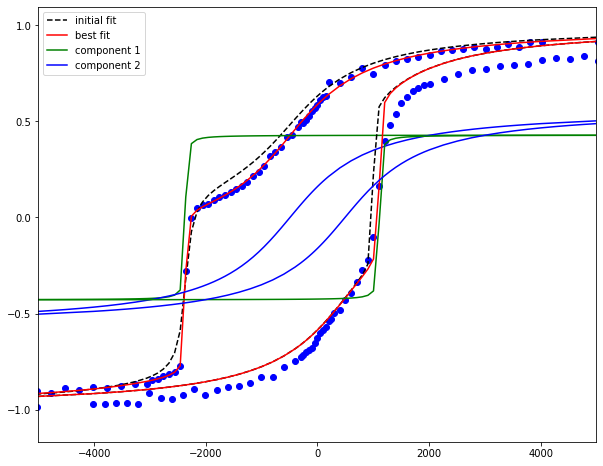

In [22]:
fig, ax = plt.subplots(figsize=(10,8))

# wyrysowanie wszystkich krzywych

plt.plot(hun, mun, 'bo')
plt.plot(hun, result.init_fit, 'k--', label='initial fit')
plt.plot(hun, result.best_fit, 'r-', label='best fit')

plt.plot(hun, mod_comp1.eval(x=hun,
                             M1=result.best_values['M1'], 
                             g1=result.best_values['g1'],
                             H1=result.best_values['H1']), 
         'g-', label='component 1')
plt.plot(hun, mod_comp2.eval(x=hun,
                             M2=result.best_values['M2'], 
                             g2=result.best_values['g2'],
                             H2=result.best_values['H2']), 
         'b-', label='component 2')

plt.plot(hln, mln, 'bo')
plt.plot(hln, result2.init_fit, 'k--')
plt.plot(hln, result2.best_fit, 'r-')

plt.plot(hln, mod_comp3.eval(x=hln,
                             M3=result.best_values['M1'], 
                             g3=result.best_values['g1'],
                             H3=result2.best_values['H3']), 
                            'g-')
plt.plot(hln, mod_comp4.eval(x=hln,
                             M4 = result.best_values['M2'],
                             g4 = result.best_values['g2'],
                             H4 = 0 - result.best_values['H2']), 
                            'b-')

plt.legend(loc='best')
plt.xlim(-5000, 5000)